In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_37675_Z')

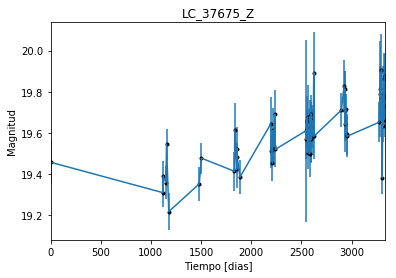

In [2]:
data = np.genfromtxt('LC_37675_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_37675_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

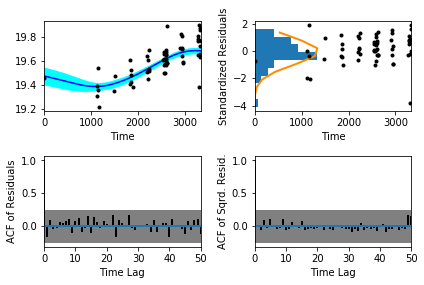

In [5]:
sample.assess_fit()

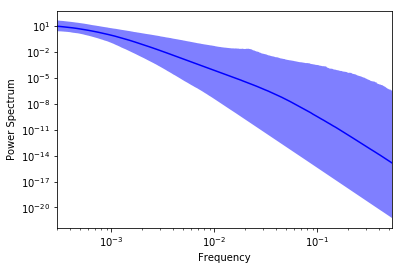

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_37675_Z')

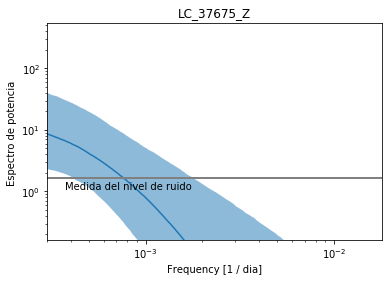

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_37675_Z')

Text(0.5,1,'Prediccion , valor esperado LC_37675_Z')

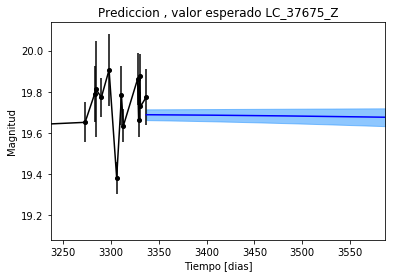

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_37675_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_37675_Z')

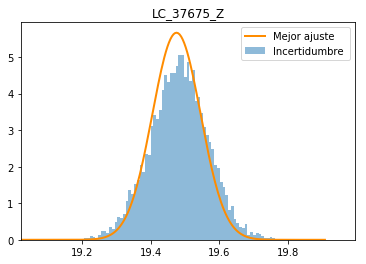

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_37675_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_37675_Z')

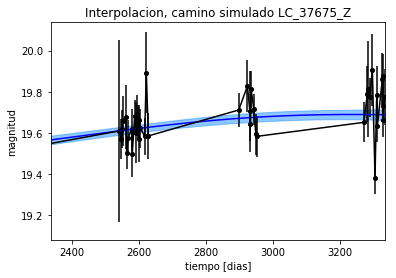

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_37675_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_37675_Z')

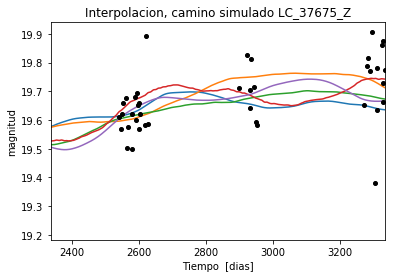

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_37675_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 454.513526596
Median: 0.00354597426264
Standard deviation: 0.162875483109
68% credibility interval: [ 0.00042395  0.09851356]
95% credibility interval: [  3.12135183e-04   6.38363071e-01]
99% credibility interval: [  3.04425446e-04   9.81057748e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1244.18487458
Median: 0.000632043514428
Standard deviation: 0.0599573349071
68% credibility interval: [ 0.00034261  0.01068818]
95% credibility interval: [ 0.00030631  0.12998363]
99% credibility interval: [  3.01004919e-04   4.62968276e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 263.099032076
Median: 0.02270447475
Standard 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 281.733557621
Median: 76.505207695
Standard deviation: 1.91648972271
68% credibility interval: [ 74.3357055  78.0819033]
95% credibility interval: [ 71.70093169  78.9949333 ]
99% credibility interval: [ 69.74074067  79.38404143]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 426.733497738
Median: 0.502938393005
Standard deviation: 2.06273405584
68% credibility interval: [ 0.04566299  3.64503628]
95% credibility interval: [ 0.01162969  6.60998054]
99% credibility interval: [  8.92955745e-03   9.65420423e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 267.068864195
Median: 0.0727951398905
Standard deviation: 7.52920418037
68% credibility interval: [  2.18945745e-03   2.62044459e+00]
95% credibility inter

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15925.9076866
Median: 9.80477965484e-36
Standard deviation: 1.02919274923e+17
68% credibility interval: [  7.80400174e-78   1.99454414e-07]
95% credibility interval: [  1.13640768e-122   1.44768607e+000]
99% credibility interval: [  5.71330094e-128   1.26371145e+002]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1359.947475
Median: 19.5316051514
Standard deviation: 0.0777012263567
68% credibility interval: [ 19.46392372  19.59830355]
95% credibility interval: [ 19.38007705  19.68411195]
99% credibility interval: [ 19.2903597   19.79061175]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 670.125495561
Median: 0.000252199356936
Standard deviation: 0.202536836699
68% credibility interval: [ 0.          0.13375047]
95% credibility interval: [ 0.          0.80248757]
99% credibility interval: [ 0.         1.0136418]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 670.125495561
Median: 0.000252199356936
Standard deviation: 0.202536836699
68% credibility interval: [ 0.          0.13375047]
95% credibility interval: [ 0.          0.80248757]
99% credibility interval: [ 0.         1.0136418]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 776.462775653
Median: 0.0
Standard deviation: 0.000183783861184
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 281.733557621
Median: 76.505207695
Standard deviation: 1.91648972271
68% credibility interval: [ 74.3357055  78.0819033]
95% credibility interval: [ 71.70093169  78.9949333 ]
99% credibility interval: [ 69.74074067  79.38404143]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 975.910521392
Median: 0.0144203279344
Standard deviation: 0.0186712516313
68% credibility interval: [ 0.00778752  0.02921746]
95% credibility interval: [ 0.00444296  0.06448874]
99% credibility interval: [ 0.00340016  0.11478402]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1625.94915904
Median: 1.00895043947
Standard deviation: 0.141534258845
68% credibility interval: [ 0.87843822  1.1550858 ]
95% credibility interval: [ 0.77420563  1.32836638]
99% credibility interval: [ 0.7217913   1.46272042]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1305.54845795
Median: 4.65512268969e-06
Standard deviation: 0.10808413105
68% credibility interval: [  5.49201778e-08   7.14259677e-04]
95% credibility interval: [  2.85759814e-09   6.51001944e-02]
99% credibility interval: [  7.40360404e-10   6.07345758e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 454.513526596
Median: (-0.0222800133867-2.69903780625j)
Standard deviation: 1.63301899869
68% credibility interval: [-0.61897893-2.40570736j -0.00266376-0.00290182j]
95% credibility interval: [ -4.01095347e+00+0.j          -1.96120320e-03-0.00038716j]
99% credibility interval: [ -6.16416763e+00+0.j          -1.91276149e-03-0.00112001j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1244.18487458
Median: (-0.00397124652335+0j)
Standard deviation: 1.32716658403
68% credibility interval: [-0.06715583 +2.52753709e+00j -0.00215268 +1.36936106e-03j]
95% credibility interval: [-0.81671122 +1.69398097e+00j -0.00192461 +5.60465256e-04j]
99% credibility interval: [ -2.90891547e+00 +3.24562903e+00j  -1.89126968e-03 +6.94012440e-